In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r"C:\Users\pankshar\Desktop\Learning material\EXCELR\Assignment\Pending17_SVM\forestfires.csv")

In [3]:
df=df.iloc[:, [2,3,4,5,6,7,8,30]]

In [4]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,small


In [5]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
x=df.iloc[:,0:7]
y=df.iloc[:,7]
M=df.values[:,0:7]


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print('There are {} samples in the training set and {} samples in the test set'. format (x_train.shape[0], x_test.shape[0]))
print()

There are 361 samples in the training set and 156 samples in the test set



In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
sc.fit(x_train)
X_train=sc.transform(x_train)
X_test=sc.transform(x_test)

In [10]:
print('After Standardizing feature, input would be like :\n')
print (pd.DataFrame(X_train, columns=x.columns).head())

After Standardizing feature, input would be like :

       FFMC       DMC        DC       ISI      temp        RH      wind
0 -1.081200 -1.575307 -1.931878 -1.041423 -1.940065  1.644522  1.303962
1  0.280837 -0.400019 -0.214746  1.186887  0.570015 -0.909431  0.804896
2  0.854326 -0.173644 -0.113644  0.871560  0.757844 -0.787814  0.305830
3  0.244994  0.643475  0.465394  1.102800  0.365110 -0.727006 -0.470495
4  0.495895  0.438808  0.209642  2.364107 -0.215452  0.489162  1.026703


In [11]:
# Model building
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


In [12]:
markers=('s','x')
colors = ('red','blue')

In [13]:
cmap=ListedColormap (colors[:len(np.unique(y_test))])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


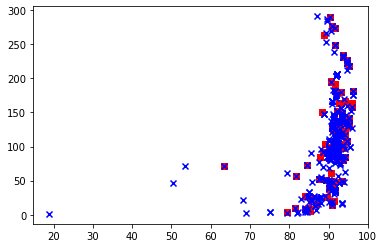

In [14]:
for idx,cl in enumerate (np.unique(y)):
  #  plt.scatter(x=x[y==cl,0],
   #             y=x[y==cl,1],
    #            c=cmap(idx),marker=markers[idx],label=cl)
    
  #  plt.scatter(M.loc[y==cl,0],
   #            M.loc[y==cl,1],
    #           c=cl)
    
   # plt.scatter(x=M[y==cl,0],
    #           y=M[y==cl,1],
     #          c=cmap(idx),marker=markers[idx],label=cl)
    
    plt.scatter(x=M[y==cl,0],
               y=M[y==cl,1],
               c=cmap(idx),marker=markers[idx],label=cl)
    

In [15]:
#model building step with linear

from sklearn.svm import SVC
model=SVC (kernel='linear',random_state=0)
model.fit(X_train,y_train)

print ('The accuracy of the SVM Classifier on training data is {:.2f}' .format(model.score(X_train,y_train)))
print ('The accuracy of the SVM Classifier on test date is {:.2f}' .format(model.score(x_test,y_test)))


The accuracy of the SVM Classifier on training data is 0.74
The accuracy of the SVM Classifier on test date is 0.71


In [16]:
#model building step with rbf
from sklearn.svm import SVC
model=SVC (kernel='rbf',random_state=0,gamma=.10,C=1.0)
model.fit(X_train,y_train)

print ('The accuracy of the SVM Classifier on training data is {:.2f}' .format(model.score(X_train,y_train)))
print ('The accuracy of the SVM Classifier on test date is {:.2f}' .format(model.score(x_test,y_test)))


The accuracy of the SVM Classifier on training data is 0.76
The accuracy of the SVM Classifier on test date is 0.71


In [30]:
import warnings



def versiontuple(v):
    return tuple (map(int,(v.split("."))))

def plot_decision_regions (x_train,y, model ,test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers=('s','x')
    colors=('red','blue')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision serface
    x1_min, x1_max= X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max= X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
        
         
#    z=np.array([xx1.ravel(), xx2.ravel()] + [np.repeat(0, xx1.ravel().size) for _ in range (7)]).T
#    z=model.predict(z).reshape(xx1.shape)
    
            
#    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
#    z=z.reshape(xx1.shape)
#    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
#    plt.xlim(xx1.min(), xx1.max())
#    plt.ylim(xx2.min(),xx2.max())


    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=M[y==cl,0],
                        y=M[y==cl,1],
                        c=cmap(idx),marker=markers[idx],label=cl)       


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


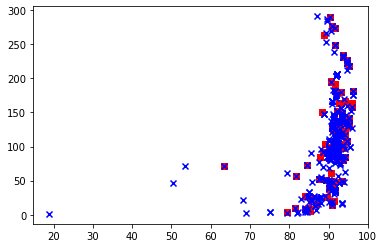

In [31]:
plot_decision_regions(X_test,y,model)